# is there any other model?

In [100]:
import xgboost as xgb

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [102]:
import os
data_dir = "../data/processed"
splits = os.listdir(data_dir)
data = np.load(data_dir + "/" + splits[0])  

In [103]:
X_train, y_train = np.asarray(data["X_train"]), np.asarray(data["y_train"]) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)


In [104]:
y_train_shuffeled = y_train[np.random.permutation(len(y_train))]

In [105]:
xgboost = xgb.XGBClassifier()


In [113]:
np.mean((xgboost.fit(X_train, y_train_shuffeled).predict(X_train) - y_train)**2)
np.mean((xgboost.fit(X_train, y_train).predict(X_train) - y_train)**2)


0.48175865294667913

In [114]:
from sklearn.model_selection import GridSearchCV
params = { "max_depth": [3,6,10],
           "learning_rate": [0.01, 0.05, 0.1],
           "n_estimators": [100, 500, 1000],
           "colsample_bytree": [0.3, 0.7]}


cross_val_classifier = GridSearchCV(estimator=xgboost, 
                   param_grid=params,
                   #scoring="neg_mean_squared_error", 
                   verbose=1)


In [116]:
cross_val_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=XGBClassifier(objective='multi:softprob'),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=1)

In [ ]:
from skopt import BayesSearchCV

In [ ]:
bayes_params = {"max_depth": (10, 500),
           "learning_rate": (1e-6, 1e-1),  
           "n_estimators": (500, 1000), 
           "colsample_bytree": (0.4, 0.8),
           }


bayes_search = BayesSearchCV(estimator=xgboost,
                    search_spaces=bayes_params, 
                    n_iter=1000,
                    cv=5,
                    n_jobs=8,
                    random_state=123)



In [ ]:
bayes_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
from beepy import beep
beep(3)

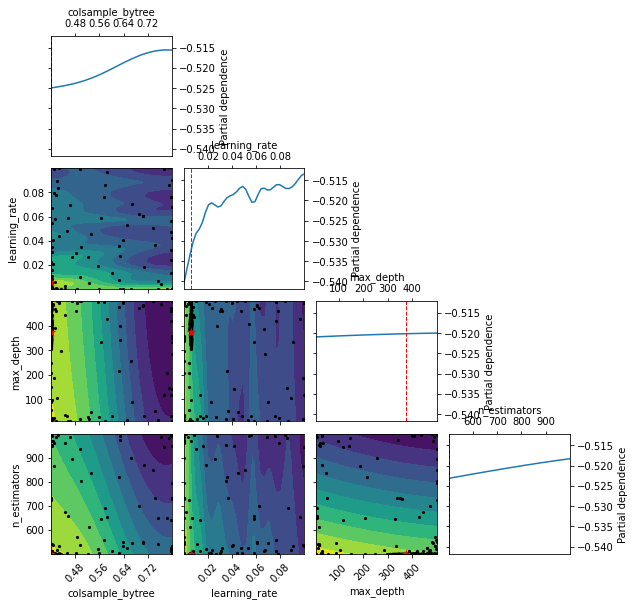

In [ ]:
from skopt.plots import plot_objective
_ = plot_objective(bayes_search.optimizer_results_[0],
                   n_minimum_search=int(1e8)
                   )

In [ ]:
y_hat = bayes_search.predict(X_val)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_hat)
np.mean(np.abs(y_val - y_hat))

0.5009487666034156